# Airbnb New User Bookings

La intención de este proyecto es pronosticar el primer destino de reserva de nuevos usuarios de Airbnb. El proyecto esta basado en el reto de Kaggle: https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/overview.

## Carga de Datos

La carga de datos del proyecto a través del API de Kaggle. Después de la instalación, se debe generar el token de autenticación desde la página web y guardarlo en el directorio C:\Users\Alfredo\.kaggle

In [6]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [28]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [29]:
api.competition_download_files('airbnb-recruiting-new-user-bookings')

In [32]:
 import os
 arr = os.listdir()
 print(arr)

['.ipynb_checkpoints', 'airbnb-recruiting-new-user-bookings.zip', 'AirbnbNewUserBookings.ipynb', 'kaggle.json']


In [1]:
from zipfile import ZipFile

In [2]:
with ZipFile('airbnb-recruiting-new-user-bookings.zip', 'r') as zipObj:
    zipObj.extractall()

In [4]:
 import os
 arr = os.listdir()
 print(arr)

['.ipynb_checkpoints', 'age_gender_bkts.csv.zip', 'airbnb-recruiting-new-user-bookings.zip', 'AirbnbNewUserBookings.ipynb', 'countries.csv.zip', 'sample_submission_NDF.csv.zip', 'sessions.csv.zip', 'test_users.csv.zip', 'train_users_2.csv.zip']


In [5]:
type(arr)

list

In [8]:
for file in arr:
    if file.endswith('.csv.zip'):
        with ZipFile(file, 'r') as zipObj:
            zipObj.extractall()

In [10]:
arr = os.listdir()
print(arr)

['.ipynb_checkpoints', 'age_gender_bkts.csv', 'age_gender_bkts.csv.zip', 'airbnb-recruiting-new-user-bookings.zip', 'AirbnbNewUserBookings.ipynb', 'countries.csv', 'countries.csv.zip', 'sample_submission_NDF.csv', 'sample_submission_NDF.csv.zip', 'sessions.csv', 'sessions.csv.zip', 'test_users.csv', 'test_users.csv.zip', 'train_users_2.csv', 'train_users_2.csv.zip']


In [1]:
import pandas as pd
import numpy as np

In [2]:
age_gender_bkts = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')
sample_submission_NDF = pd.read_csv('sample_submission_NDF.csv')
sessions = pd.read_csv('sessions.csv')
test_users = pd.read_csv('test_users.csv')
train_users = pd.read_csv('train_users_2.csv')

In [3]:
dfs = [age_gender_bkts, countries, sample_submission_NDF, sessions, test_users, train_users]

## Análisis Exploratorio
Análisis inicial para conocer los archivos descargados y sus estadísticas básicas. 

### age_gender_bkts

In [4]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [5]:
age_gender_bkts.tail()

,age_bucket,country_destination,gender,population_in_thousands,year
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0
419,80-84,US,male,2442.0,2015.0


In [6]:
age_gender_bkts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [7]:
age_gender_bkts.describe()

,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


In [8]:
age_gender_bkts['age_bucket'].unique()

array(['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

### countries

In [9]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [10]:
countries.tail()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [11]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes


In [12]:
countries.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


### sample_submission_NDF

In [13]:
sample_submission_NDF.head()

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


### sessions

In [14]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [15]:
sessions.tail()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0
10567736,9uqfg8txu3,show_personalize,data,user_profile_content_update,Windows Desktop,1221.0


In [16]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [17]:
sessions.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [18]:
for col in sessions.columns:
    print(str(col)+ " with " + str(len(sessions[col].unique()))+ " unique elements.")
    print(str(col)+ " has " + str(sessions[col].isnull().sum())+ " null values.")
    print(sessions[col].unique()[1:10])
    print("\n")

user_id with 135484 unique elements.
user_id has 34496 null values.
['yo8nz8bqcq' '4grx6yxeby' 'ncf87guaf0' '4rvqpxoh3h' 'c8mfesvkv0'
 'xwxei6hdk4' '5f45ro5uzk' 'ro2stddszp' 'qtw88d9pbl']


action with 360 unique elements.
action has 79626 null values.
['search_results' 'personalize' 'index' 'similar_listings'
 'ajax_refresh_subtotal' 'show' 'header_userpic' 'ask_question' nan]


action_type with 11 unique elements.
action_type has 1126204 null values.
['click' 'data' 'view' 'submit' 'message_post' '-unknown-'
 'booking_request' 'partner_callback' 'booking_response']


action_detail with 156 unique elements.
action_detail has 1126204 null values.
['view_search_results' 'wishlist_content_update' 'similar_listings'
 'change_trip_characteristics' 'p3' 'header_userpic' 'contact_host'
 'message_post' '-unknown-']


device_type with 14 unique elements.
device_type has 0 null values.
['-unknown-' 'Mac Desktop' 'Android Phone' 'iPhone' 'iPad Tablet'
 'Android App Unknown Phone/Tablet' 'Linux D

### test_users

In [19]:
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [20]:
test_users.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari
62095,9uqfg8txu3,2014-09-30,20140930235901,NaN,FEMALE,49.0,basic,0,en,other,other,tracked-other,Web,Windows Desktop,Chrome


In [21]:
test_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [22]:
test_users.describe()

,timestamp_first_active,date_first_booking,age,signup_flow
count,6.209600e+04,0.0,33220.000000,62096.000000
mean,2.014081e+13,NaN,37.616677,7.813885
std,8.024585e+07,NaN,74.440647,11.254291
min,2.014070e+13,NaN,1.000000,0.000000
25%,2.014072e+13,NaN,26.000000,0.000000
50%,2.014081e+13,NaN,31.000000,0.000000
75%,2.014091e+13,NaN,40.000000,23.000000
max,2.014093e+13,NaN,2002.000000,25.000000


### train_users

In [23]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [24]:
train_users.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
213450,nw9fwlyb5f,2014-06-30,20140630235824,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [25]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [26]:
train_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [27]:
for col in train_users.columns:
    print(str(col)+ " with " + str(len(train_users[col].unique()))+ " unique elements.")
    print(str(col)+ " has " + str(train_users[col].isnull().sum())+ " null values.")
    print(train_users[col].unique()[1:10])
    print("\n")

id with 213451 unique elements.
id has 0 null values.
['820tgsjxq7' '4ft3gnwmtx' 'bjjt8pjhuk' '87mebub9p4' 'osr2jwljor'
 'lsw9q7uk0j' '0d01nltbrs' 'a1vcnhxeij' '6uh8zyj2gn']


date_account_created with 1634 unique elements.
date_account_created has 0 null values.
['2011-05-25' '2010-09-28' '2011-12-05' '2010-09-14' '2010-01-01'
 '2010-01-02' '2010-01-03' '2010-01-04' '2010-01-05']


timestamp_first_active with 213451 unique elements.
timestamp_first_active has 0 null values.
[20090523174809 20090609231247 20091031060129 20091208061105
 20100101215619 20100102012558 20100103191905 20100104004211
 20100104023758]


date_first_booking with 1977 unique elements.
date_first_booking has 124543 null values.
['2010-08-02' '2012-09-08' '2010-02-18' '2010-01-02' '2010-01-05'
 '2010-01-13' '2010-07-29' '2010-01-04' '2010-01-06']


gender with 4 unique elements.
gender has 0 null values.
['MALE' 'FEMALE' 'OTHER']


age with 128 unique elements.
age has 87990 null values.
[38. 56. 42. 41. 46. 47. 5

## Limpieza de datos

Limpieza de datos para el dataframe train_users. Se utilizará este dataframe para correr un primer modelo.

### Conversión de fechas

In [28]:
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'], format= '%Y-%m-%d')
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'], format = '%Y-%m-%d', errors = 'coerce')

In [29]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  int64         
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

### Manejo de valores faltantes

Eliminación de valores faltantes del dataframe.

Se elimina la columna de date_first_booking bajo la hipótesis de que no será un valor determinante para predecir el destino. Una vez que se ajuste el modelo, se re evaluará esta decisión.

In [30]:
train_users2 = train_users.loc[:, train_users.columns != 'date_first_booking']

In [31]:
train_users2 = train_users2.dropna(axis = 0)
train_users2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123429 entries, 1 to 213448
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       123429 non-null  object        
 1   date_account_created     123429 non-null  datetime64[ns]
 2   timestamp_first_active   123429 non-null  int64         
 3   gender                   123429 non-null  object        
 4   age                      123429 non-null  float64       
 5   signup_method            123429 non-null  object        
 6   signup_flow              123429 non-null  int64         
 7   language                 123429 non-null  object        
 8   affiliate_channel        123429 non-null  object        
 9   affiliate_provider       123429 non-null  object        
 10  first_affiliate_tracked  123429 non-null  object        
 11  signup_app               123429 non-null  object        
 12  first_device_typ

### Manejo de outliers

Durante el análisis exploratorio, se observó que la variable de age contiene valores outliers. Estos valores son claros errores (edad > 2000) por lo que se excluirán del set para evitar ruido.

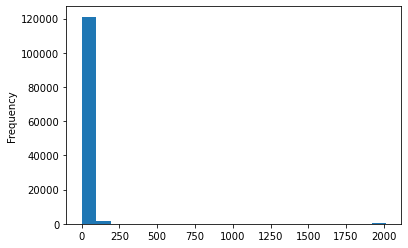

In [32]:
hist = train_users2['age'].plot.hist(bins = 21)

In [33]:
train_users2[train_users2 ['age']>100]['age'].describe()

count    2295.000000
mean      724.203922
std       892.332046
min       101.000000
25%       105.000000
50%       105.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [34]:
train_users2 = train_users2[train_users2['age']< 106 ]

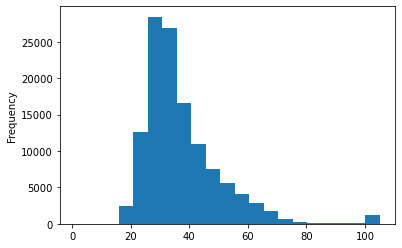

In [35]:
ax = train_users2['age'].plot.hist(bins=21)

In [36]:
train_users2['age'].describe()

count    122389.000000
mean         37.221008
std          13.512084
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         105.000000
Name: age, dtype: float64

In [37]:
train_users2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122389 entries, 1 to 213448
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       122389 non-null  object        
 1   date_account_created     122389 non-null  datetime64[ns]
 2   timestamp_first_active   122389 non-null  int64         
 3   gender                   122389 non-null  object        
 4   age                      122389 non-null  float64       
 5   signup_method            122389 non-null  object        
 6   signup_flow              122389 non-null  int64         
 7   language                 122389 non-null  object        
 8   affiliate_channel        122389 non-null  object        
 9   affiliate_provider       122389 non-null  object        
 10  first_affiliate_tracked  122389 non-null  object        
 11  signup_app               122389 non-null  object        
 12  first_device_typ

In [38]:
feature_cols = ['gender', 'age', 'signup_method','signup_flow','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app', 'first_device_type', 'first_browser']
X = train_users2[feature_cols] # Features
X = pd.get_dummies(X)

## Modelo de predicción

El problema plantea un modelo de clasificación de aprendizaje supervisado. Al tener tantas variables categóricas se determinó que árbol de decisión es un buen candidato.

In [39]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [40]:
from sklearn import preprocessing

In [41]:
np_X = X.to_numpy()

In [42]:
le = preprocessing.LabelEncoder()
le.fit(train_users2.country_destination)
le.classes_
y = le.transform(train_users2.country_destination)

#y = train_users2.country_destination # Target variable

In [43]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(np_X, y, test_size=0.2, random_state=0) # 70% training and 30% test

In [44]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4627012010785195


In [56]:
from sklearn import tree
tree.plot_tree(clf)

[Text(212.99902384331727, 215.628, 'X[7] <= 0.5\ngini = 0.641\nsamples = 97911\nvalue = [347, 834, 699, 1326, 2938, 1377, 1632, 43717, 466\n131, 38442, 6002]'),
 Text(122.90671929767332, 212.004, 'X[2] <= 0.5\ngini = 0.657\nsamples = 52998\nvalue = [239, 583, 431, 840, 1977, 913, 1110, 17168, 318, 83\n25412, 3924]'),
 Text(85.91491739334242, 208.38, 'X[0] <= 40.5\ngini = 0.659\nsamples = 40430\nvalue = [188, 435, 333, 634, 1499, 691, 841, 13854, 242, 63\n18765, 2885]'),
 Text(37.10980124725875, 204.756, 'X[0] <= 23.5\ngini = 0.655\nsamples = 27845\nvalue = [128, 313, 224, 495, 1004, 435, 581, 8914, 167, 45\n13495, 2044]'),
 Text(6.215042573396817, 201.132, 'X[73] <= 0.5\ngini = 0.693\nsamples = 2249\nvalue = [7, 19, 23, 63, 101, 44, 76, 847, 18, 5, 886, 160]'),
 Text(4.00087816031613, 197.50799999999998, 'X[62] <= 0.5\ngini = 0.648\nsamples = 1093\nvalue = [3, 6, 11, 22, 32, 16, 23, 484, 3, 2, 423, 68]'),
 Text(3.126560728803794, 193.884, 'X[79] <= 0.5\ngini = 0.65\nsamples = 896\nvalu

Error in callback <function flush_figures at 0x00000232A961EDC8> (for post_execute):


KeyboardInterrupt: 